In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

Our Data from Kaggle:

In [2]:
df_bit_raw = pd.read_csv('BTC-USD.csv')
df_bit_raw['Date'] = pd.to_datetime(df_bit_raw['Date'])

df_bit_raw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3224,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470
3225,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074
3226,2023-07-18,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269
3227,2023-07-19,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269


S&P 500 Index USA:

https://www.marketwatch.com/investing/index/spx/download-data?startDate=9/17/2014&endDate=7/20/2015

In [3]:
df_sp_raw = pd.read_csv('INDEX_US_S&P US_SPX.csv')
df_sp_raw = df_sp_raw[::-1].reset_index(drop=True)
df_sp_raw['Date'] = pd.to_datetime(df_sp_raw['Date'])

df_sp_raw

,Date,Open,High,Low,Close
0,2014-09-17,1999.30,2010.74,1993.29,2001.57
1,2014-09-18,2003.07,2012.34,2003.07,2011.36
2,2014-09-19,2012.74,2019.26,2006.59,2010.40
3,2014-09-22,2009.08,2009.08,1991.01,1994.29
4,2014-09-23,1992.78,1995.41,1982.77,1982.77
...,...,...,...,...,...
2220,2023-07-14,4514.61,4527.76,4499.56,4505.42
2221,2023-07-17,4508.86,4532.85,4504.90,4522.79
2222,2023-07-18,4521.78,4562.30,4514.59,4554.98
2223,2023-07-19,4563.87,4578.43,4557.48,4565.72


Value of gold USD:

https://www.gold.org/goldhub/data/gold-prices#registration-type=google&just-verified=1

In [4]:
df_gd_raw = pd.read_csv('Gold.csv')
df_gd_raw['Date'] = pd.to_datetime(df_gd_raw['Date'])

df_gd_raw

,Date,USD
0,2014-09-17,1236.0
1,2014-09-18,1220.5
2,2014-09-19,1219.8
3,2014-09-22,1213.5
4,2014-09-23,1222.0
...,...,...
2302,2023-07-14,1953.7
2303,2023-07-17,1949.6
2304,2023-07-18,1975.0
2305,2023-07-19,1975.4


This data set does not have all days of the year, therefore the following will dectect which days are missing, create an index for it, and will replicate the former's day value into it.

In [5]:
j = 0
while j < 3:
    missing_dates = df_bit_raw[~df_bit_raw['Date'].isin(df_sp_raw['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_sp_raw.loc[df_sp_raw['Date'] == prev_date, ['Open', 'High', 'Low', 'Close']].values
        if len(prev_values) > 0:
            prev_value1, prev_value2, prev_value3, prev_value4 = prev_values[0]
            new_row = {'Date': date, 'Open': prev_value1, 'High': prev_value2, 'Low': prev_value3, 'Close': prev_value4}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_sp_raw = pd.concat([df_sp_raw, df_to_append], ignore_index=True)
    df_sp_raw['Date'] = pd.to_datetime(df_sp_raw['Date'])
    df_sp_raw = df_sp_raw.sort_values('Date')
    df_sp_raw = df_sp_raw.reset_index(drop=True)
    j += 1
df_sp_raw

,Date,Open,High,Low,Close
0,2014-09-17,1999.30,2010.74,1993.29,2001.57
1,2014-09-18,2003.07,2012.34,2003.07,2011.36
2,2014-09-19,2012.74,2019.26,2006.59,2010.40
3,2014-09-20,2012.74,2019.26,2006.59,2010.40
4,2014-09-21,2012.74,2019.26,2006.59,2010.40
...,...,...,...,...,...
3224,2023-07-16,4514.61,4527.76,4499.56,4505.42
3225,2023-07-17,4508.86,4532.85,4504.90,4522.79
3226,2023-07-18,4521.78,4562.30,4514.59,4554.98
3227,2023-07-19,4563.87,4578.43,4557.48,4565.72


In [6]:
j = 0
while j < 3:
    missing_dates = df_bit_raw[~df_bit_raw['Date'].isin(df_gd_raw['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_gd_raw.loc[df_gd_raw['Date'] == prev_date, 'USD'].values
        if len(prev_values) > 0:
            prev_value1 = prev_values[0]
            new_row = {'Date': date, 'USD': prev_value1}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_gd_raw = pd.concat([df_gd_raw, df_to_append], ignore_index=True)
    df_gd_raw['Date'] = pd.to_datetime(df_gd_raw['Date'])
    df_gd_raw = df_gd_raw.sort_values('Date')
    df_gd_raw = df_gd_raw.reset_index(drop=True)
    j += 1
df_gd_raw

,Date,USD
0,2014-09-17,1236.0
1,2014-09-18,1220.5
2,2014-09-19,1219.8
3,2014-09-20,1219.8
4,2014-09-21,1219.8
...,...,...
3224,2023-07-16,1953.7
3225,2023-07-17,1949.6
3226,2023-07-18,1975.0
3227,2023-07-19,1975.4


Now we create a new Data Frame with the data that will be used.

In [7]:
df_sp_raw = df_sp_raw.rename(columns={'Close': 'S&P 500 (USD)'})
df_bit_raw = df_bit_raw.rename(columns={'Adj Close': 'Bitcoin (USD)', 'Volume' : 'Volume Bitcoin'})
df_gd_raw = df_gd_raw.rename(columns={'USD': 'Gold (USD)'})

df = pd.concat([df_bit_raw['Date'], df_bit_raw['Bitcoin (USD)'], df_bit_raw['Volume Bitcoin'], df_sp_raw['S&P 500 (USD)'], df_gd_raw['Gold (USD)']], axis=1)

df['Date'] = (df['Date'] - pd.to_datetime('2014-09-17')).dt.days

df

,Date,Bitcoin (USD),Volume Bitcoin,S&P 500 (USD),Gold (USD)
0,0,457.334015,21056800,2001.57,1236.0
1,1,424.440002,34483200,2011.36,1220.5
2,2,394.795990,37919700,2010.40,1219.8
3,3,408.903992,36863600,2010.40,1219.8
4,4,398.821014,26580100,2010.40,1219.8
...,...,...,...,...,...
3224,3224,30249.132813,8516564470,4505.42,1953.7
3225,3225,30145.888672,13240156074,4522.79,1949.6
3226,3226,29856.562500,13138897269,4554.98,1975.0
3227,3227,29856.562500,13138897269,4565.72,1975.4


The following measure the correlation between the data. 1 means perfect correlation.

In [8]:
df.corr('pearson')

,Date,Bitcoin (USD),Volume Bitcoin,S&P 500 (USD),Gold (USD)
Date,1.000000,0.749155,0.679699,0.937512,0.902791
Bitcoin (USD),0.749155,1.000000,0.701682,0.896492,0.766235
Volume Bitcoin,0.679699,0.701682,1.000000,0.690874,0.709976
S&P 500 (USD),0.937512,0.896492,0.690874,1.000000,0.899713
Gold (USD),0.902791,0.766235,0.709976,0.899713,1.000000


Plot of correlation:

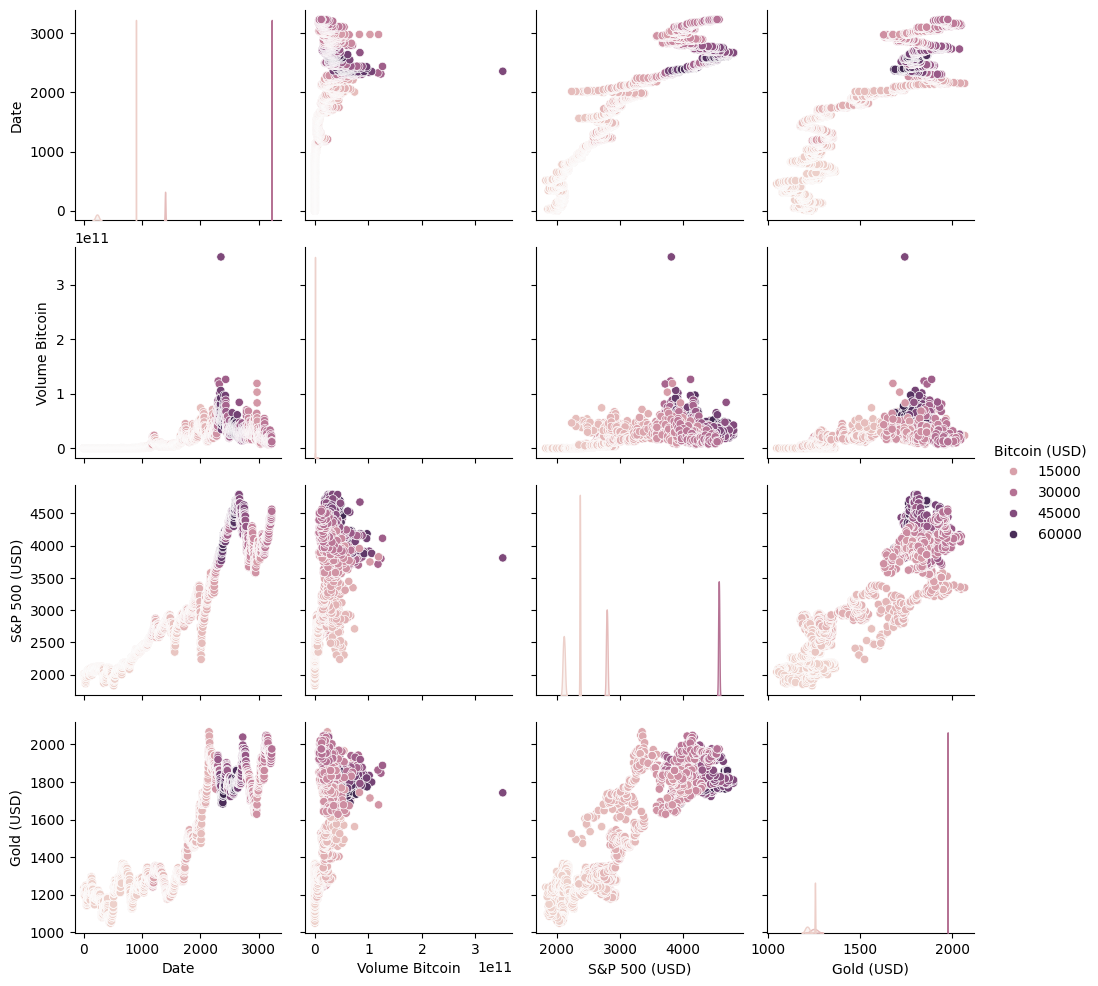

In [9]:
sns.pairplot(df, hue='Bitcoin (USD)')
plt.show()

Now, the linear regression will be built:

In [10]:
train, test = train_test_split(df, test_size=0.4, shuffle=True)

X_train = train.loc[:, train.columns != 'Bitcoin (USD)']
Y_train = train.loc[:,['Bitcoin (USD)']]

X_test = test.loc[:, test.columns != 'Bitcoin (USD)']
Y_test = test.loc[:,['Bitcoin (USD)']]

model_linear = LinearRegression()
model_linear.fit(X_train, Y_train)

Y_pred = model_linear.predict(X_test)

print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test, Y_pred):.3f}%')
print(f'Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred):.3f}')
print(f'R2 Score: {r2_score(Y_test, Y_pred):.3f}')

Mean Absolute Percentage Error: 2.299%
Mean Absolute Error: 3668.646
R2 Score: 0.889
